# NYC Airbnb: EDA, Visualization, Regression
EDA - Visualization - Modeling

<img src="https://i.imgur.com/UIQCjMy.jpg" width="700px">

Photo by [Andre Benz](https://unsplash.com/@trapnation) on Unsplash

# Table of Content

**1. Dataset**  
**2. Exploratory Data Analysis**  
**3. Visualization**  
**4. Modeling first model**  
**5. Modeling second model**   
**6. Conclusion**  
**7. References**  

# 1. Dataset
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data  

* **id**: listing ID
* **name**: name of the listing
* **host_id**: host ID
* **host_name**: name of the host
* **neighbourhood_group**: location
* **neighbourhood**: area
* **latitude**: latitude coordinates
* **longitude**: longitude coordinates
* **room_type**: listing space type
* **price**: price in dollars
* **minimum_nights**: amount of nights minimum
* **number_of_reviews**: number of reviews
* **last_review**: latest review
* **reviews_per_month**: number of reviews per month
* **calculated_host_listings_count**: amount of listing per host
* **availability_365**: number of days when listing is available for booking

In [1]:
# Import all libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # ploting the data
import seaborn as sns # ploting the data
import math # calculation

# 2. Exploratory Data Analysis

* Examine the number of variable and columns  
* Check that the dataset is tidy  
    * Check that every row is an observation and every column is a variable  
    * Determine if there are missing values
* Examine variables distributions

In [2]:
# load the data
data = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
# Visualize data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

We drop the columns that are not of interest or could cause privacy isssues.  
See Dgomonov's work here:  https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb   

In [4]:
# Drop the data that are not of interest and/or causing privacy issues
data.drop(['id','host_name','last_review'], axis=1, inplace=True)
# Visualize the first 5 rows
data.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [5]:
# Determine the number of missing values for every column
data.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#replacing all NaN values in 'reviews_per_month' with 0
# See https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
data.fillna({'reviews_per_month':0}, inplace=True)

In [7]:
#examine the dataset
(data[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']]
 .describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# Exclude property with listed price of 0
data = data.loc[data['price'] > 0]
# data_copy = data.copy()

In [9]:
#examine the dataset
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
# Recode data as categorical
# https://datascience.stackexchange.com/questions/29093/continuous-variable-to-categorical-by-quartiles
data_encoded = data.copy()
data_encoded['minimum_nights'] = pd.qcut(data['minimum_nights'], q=2, labels=["minimum_nights_low", "minimum_nights_high"])
data_encoded['number_of_reviews'] = pd.qcut(data['number_of_reviews'], q=3, labels=["number_of_reviews_low", "minimum_nights_medium", "number_of_reviews_high"])
data_encoded['reviews_per_month'] = pd.qcut(data['reviews_per_month'], q=2, labels=["reviews_per_month_low", "reviews_per_month_high"])
data_encoded['calculated_host_listings_count'] = pd.cut(data['calculated_host_listings_count'], 
                                                bins=[0, 2, 327],
                                                labels=["calculated_host_listings_count_low", "calculated_host_listings_count_high"])
data_encoded['availability_365'] = pd.qcut(data['availability_365'], q=2, labels=["availability_low", "availability_high"])

In [11]:
data_encoded.isnull().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
data_encoded.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,minimum_nights_low,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_high,availability_high
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,minimum_nights_low,number_of_reviews_low,reviews_per_month_low,calculated_host_listings_count_low,availability_high
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low


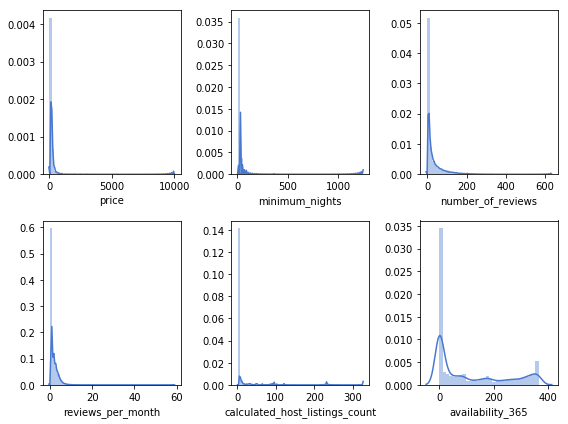

In [13]:
sns.set_palette("muted")
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.distplot(data['price'])

subplot(2,3,2)
sns.distplot(data['minimum_nights'])

subplot(2,3,3)
sns.distplot(data['number_of_reviews'])

subplot(2,3,4)
sns.distplot(data['reviews_per_month'])

subplot(2,3,5)
sns.distplot(data['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(data['availability_365'])

plt.tight_layout() # avoid overlap of plotsplt.draw()

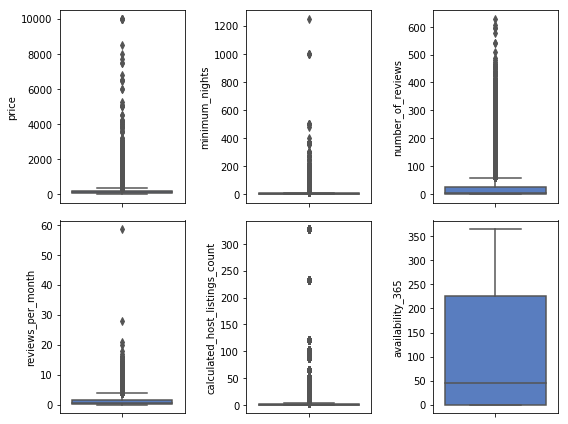

In [14]:
from pylab import *
f, ax = plt.subplots(figsize=(8, 6))

subplot(2,3,1)
sns.boxplot(y = data['price']) 

subplot(2,3,2)
sns.boxplot(y = data['minimum_nights'])

subplot(2,3,3)
sns.boxplot(y = data['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = data['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = data['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = data['availability_365'])

plt.tight_layout() # avoid overlap of plots
plt.draw()

* Most features are left-skewed. 
* I will use a log transform before the modeling step.

In [15]:
# Set up color blind friendly color palette
# The palette with grey:
cbPalette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
# The palette with black:
cbbPalette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# sns.palplot(sns.color_palette(cbPalette))
# sns.palplot(sns.color_palette(cbbPalette))

sns.set_palette(cbPalette)
#sns.set_palette(cbbPalette)

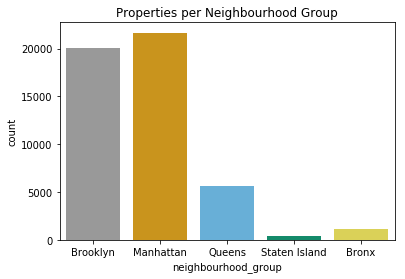

In [16]:
title = 'Properties per Neighbourhood Group'
sns.countplot(data['neighbourhood_group'])
plt.title(title)
plt.ioff()

Most properties are located in Brooklyn and Manhattan.

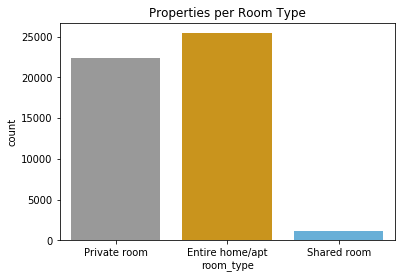

In [17]:
title = 'Properties per Room Type'
sns.countplot(data['room_type'])
plt.title(title)
plt.ioff()

Most properties are Entire home or Private room.

# 3. Visualization

* Examine relation between location and price
* Examine relation between room type and price

# 3.1 Correlation

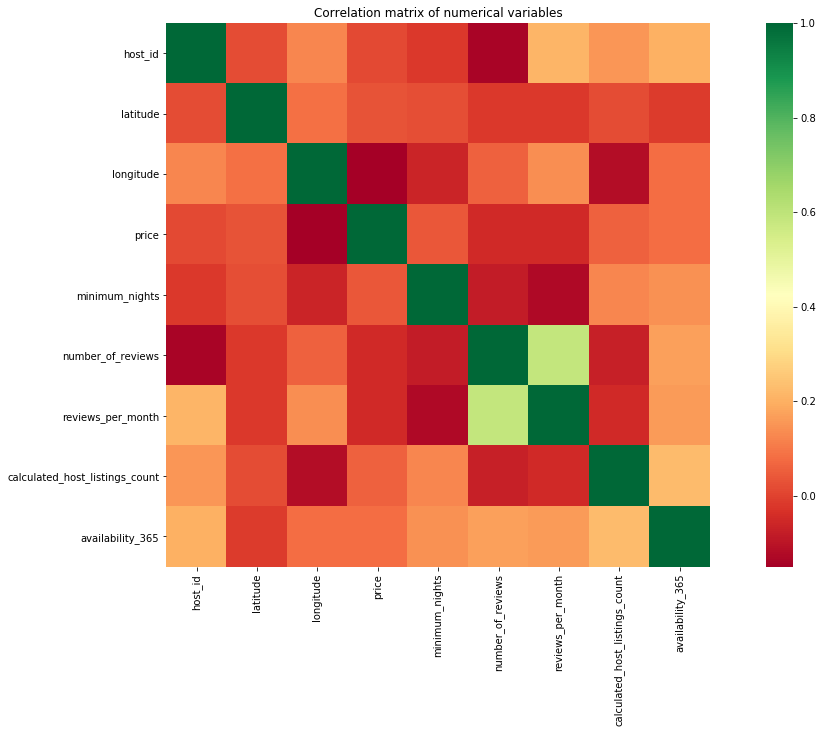

In [18]:
plt.figure(figsize=(20,10))
title = 'Correlation matrix of numerical variables'
sns.heatmap(data.corr(), square=True, cmap='RdYlGn')
plt.title(title)
plt.ioff()

## 3.2 Location

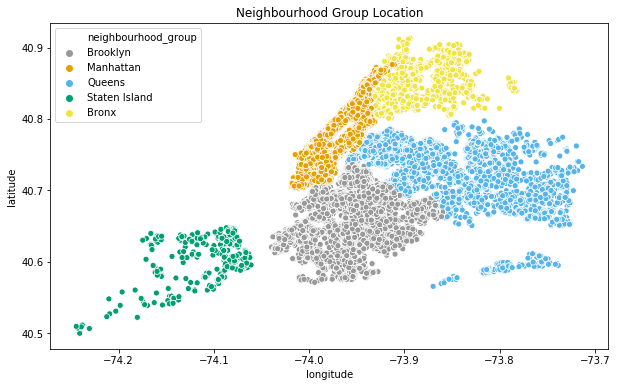

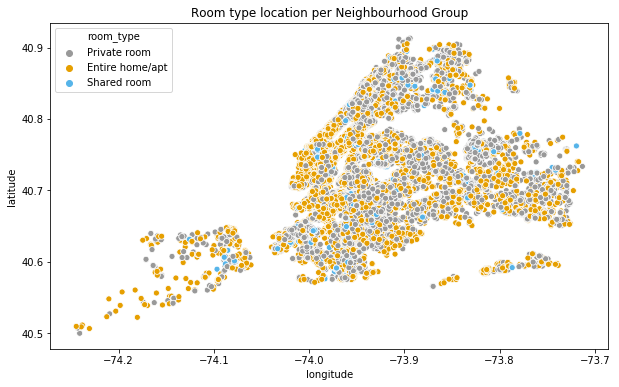

In [19]:
# See https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.room_type).set_title(title)
plt.ioff()

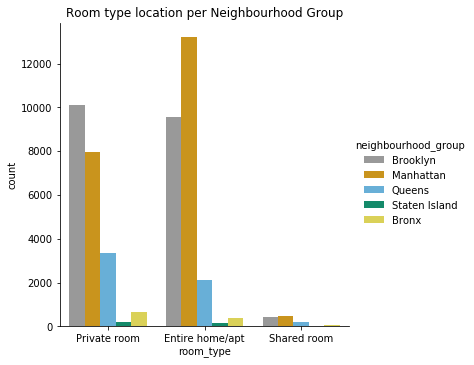

In [20]:
title = 'Room type location per Neighbourhood Group'
sns.catplot(x='room_type', kind="count", hue="neighbourhood_group", data=data);
plt.title(title)
plt.ioff()

* A majority of Entire home/apt are located in Manhattan
* A majority of private rooms are located in Brooklyn

## 3.3 Price relation to Neighbourhood Group

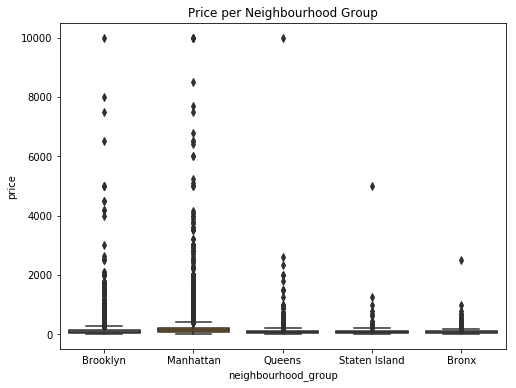

In [21]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
#http://seaborn.pydata.org/tutorial/color_palettes.html

x= 'neighbourhood_group'
y= 'price'
title = 'Price per Neighbourhood Group'

f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data)
plt.title(title)
plt.ioff()

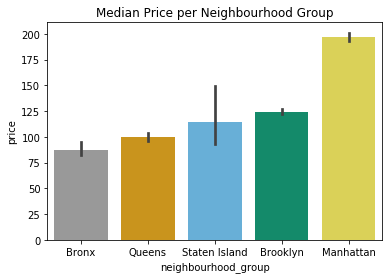

In [22]:
# alternative visualization of median less impacted by the extreme values
# see https://www.kaggle.com/nidaguler/eda-and-data-visualization-ny-airbnb

title = 'Median Price per Neighbourhood Group'
result = data.groupby(["neighbourhood_group"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='neighbourhood_group', y="price", data=data, order=result['neighbourhood_group'])
plt.title(title)
plt.ioff()

* Properties in Manhattan are more expensive
* The dataset can be separate between low price and high price properties

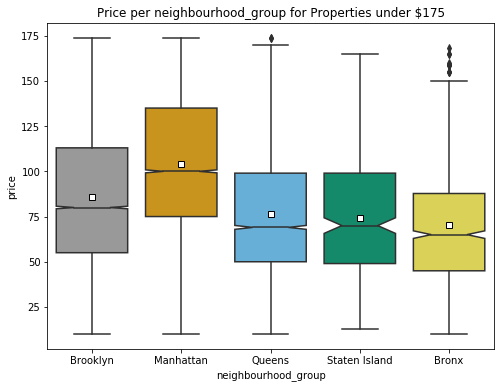

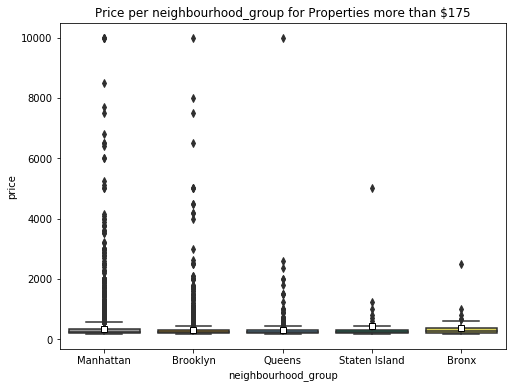

In [23]:
# https://stackoverflow.com/questions/54132989/is-there-a-way-to-change-the-color-and-shape-indicating-the-mean-in-a-seaborn-bo
x='neighbourhood_group'
y='price'

title = 'Price per neighbourhood_group for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()
f
title = 'Price per neighbourhood_group for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

In [24]:
# Is the location impact on price statiscaly significant?
# Use on way ANOVA and pairwise comaprison
# See https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

import statsmodels.api as sm
from statsmodels.formula.api import ols

data_filtered = data.loc[data['price'] < 175]

mod = ols('price ~ neighbourhood_group',data=data_filtered).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                           sum_sq       df           F  PR(>F)
neighbourhood_group  4.188339e+06      4.0  806.494493     0.0
Residual             4.666018e+07  35939.0         NaN     NaN


In [25]:
pair_t = mod.t_test_pairwise('neighbourhood_group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Brooklyn-Bronx,15.539434,1.161363,13.380342,9.863414e-41,13.263127,17.815740,0.000000e+00,True
Manhattan-Bronx,33.543248,1.170763,28.650759,1.605347e-178,31.248517,35.837978,0.000000e+00,True
Queens-Bronx,6.060759,1.235087,4.907151,9.281261e-07,3.639951,8.481566,2.784376e-06,True
Staten Island-Bronx,3.662572,2.283992,1.603584,1.088146e-01,-0.814120,8.139264,2.057885e-01,False
Manhattan-Brooklyn,18.003814,0.422746,42.587799,0.000000e+00,17.175220,18.832408,0.000000e+00,True
Queens-Brooklyn,-9.478675,0.577467,-16.414234,2.509627e-60,-10.610527,-8.346823,0.000000e+00,True
Staten Island-Brooklyn,-11.876861,2.006152,-5.920220,3.244239e-09,-15.808979,-7.944743,1.297696e-08,True
Queens-Manhattan,-27.482489,0.596146,-46.100273,0.000000e+00,-28.650953,-26.314025,0.000000e+00,True
Staten Island-Manhattan,-29.880675,2.011608,-14.854123,9.193965e-50,-33.823488,-25.937863,0.000000e+00,True
Staten Island-Queens,-2.398186,2.049712,-1.170011,2.420042e-01,-6.415684,1.619311,2.420042e-01,False


Prices are significantly different depending between neighborhood groups for properties under $175.

## 3.4 Price relation to Room Type

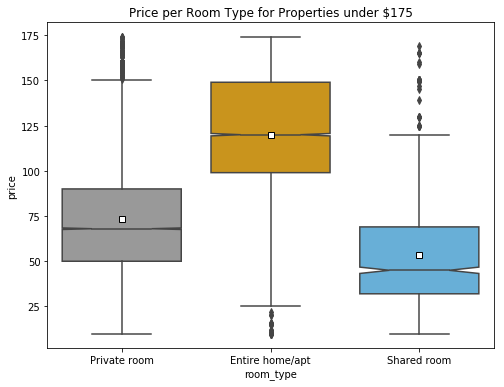

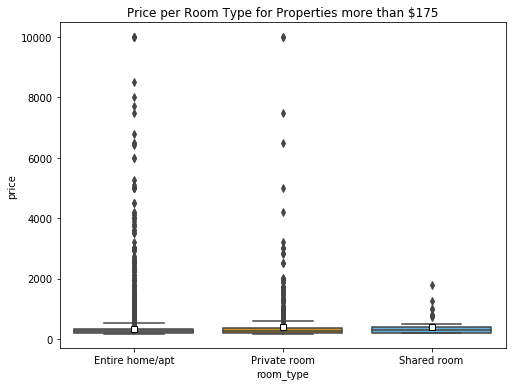

In [26]:
title = 'Price per Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#### 3.5 Price relation to the number of review per month

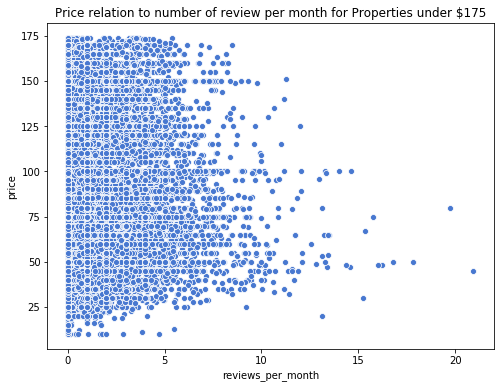

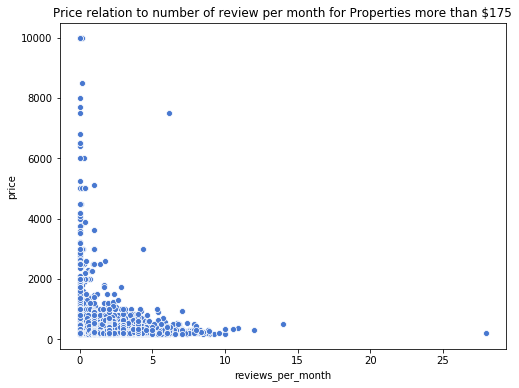

In [27]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'reviews_per_month'
y = 'price'

title = 'Price relation to number of review per month for Properties under $175'
data_filtered = data.loc[(data['price'] < 175) & (data['reviews_per_month'] < 30)]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

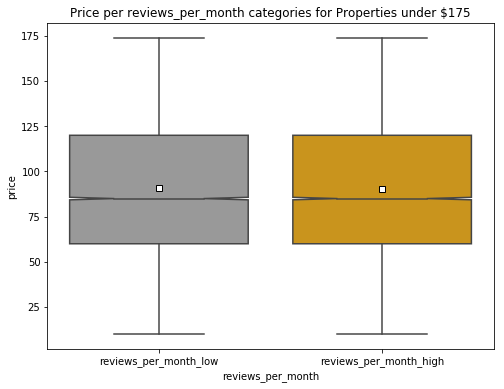

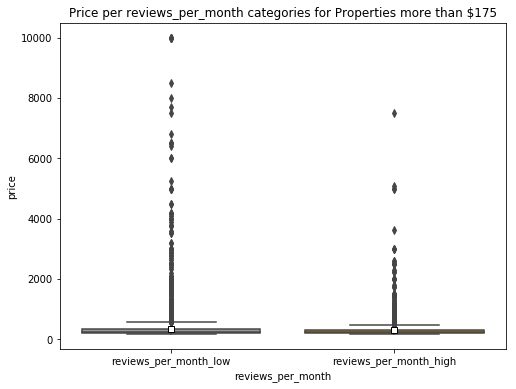

In [28]:
x='reviews_per_month'
y='price'

title = 'Price per reviews_per_month categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per reviews_per_month categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#### 3.6 Price relation to the number_of_reviews

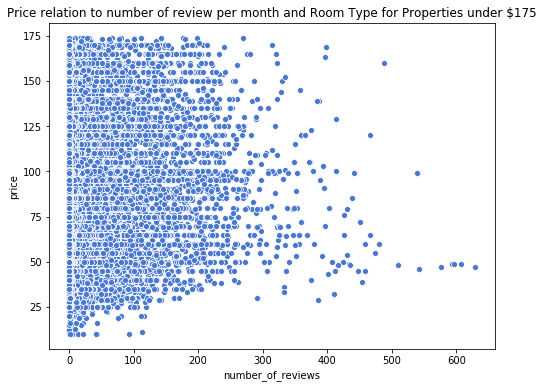

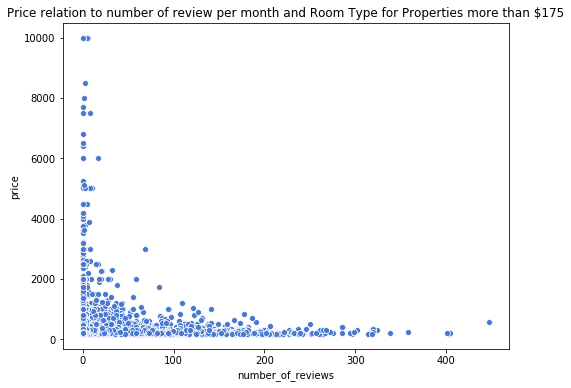

In [29]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'number_of_reviews'
y = 'price'

title = 'Price relation to number of review per month and Room Type for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to number of review per month and Room Type for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

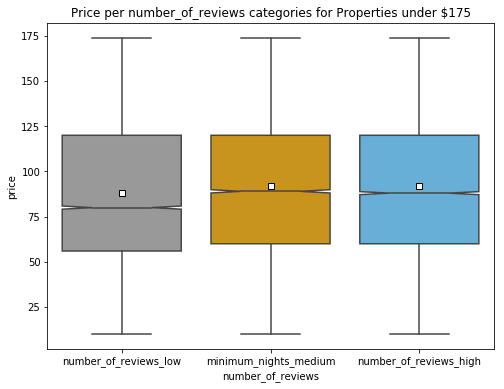

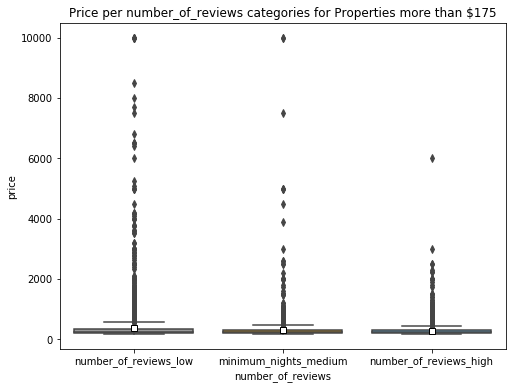

In [30]:
x = 'number_of_reviews'
y='price'

title = 'Price per number_of_reviews categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per number_of_reviews categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#### 3.7 Price relation to minimum_nights

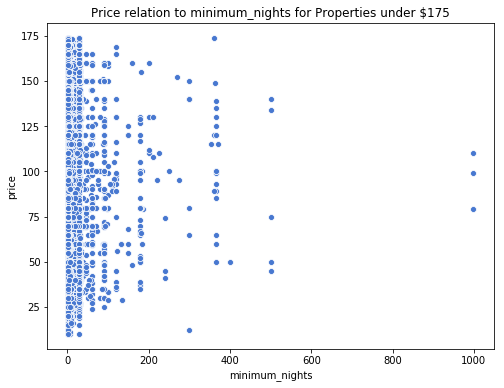

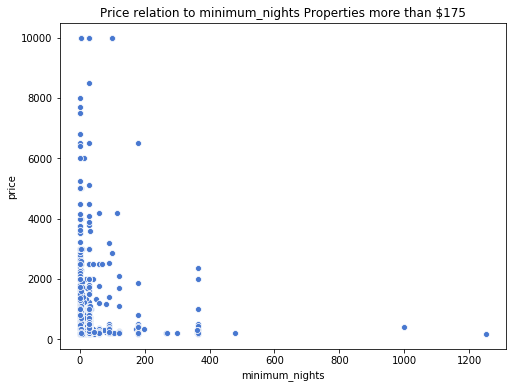

In [31]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'minimum_nights'
y = 'price'

title = 'Price relation to minimum_nights for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to minimum_nights Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

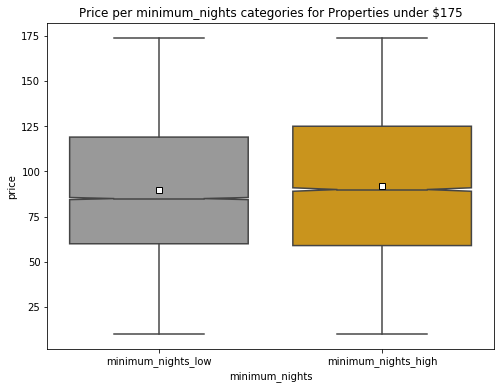

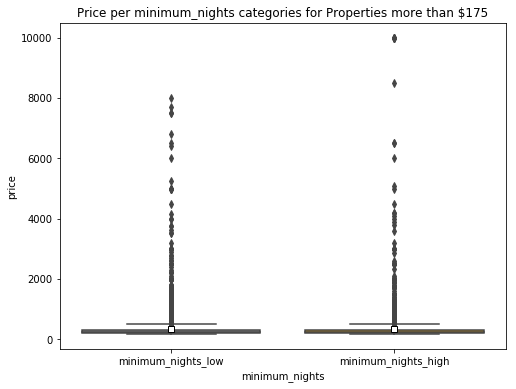

In [32]:
x = 'minimum_nights'
y='price'

title = 'Price per minimum_nights categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per minimum_nights categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#### 3.8 Price relation to calculated_host_listings_count

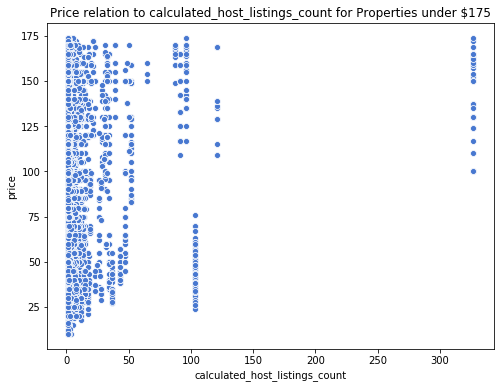

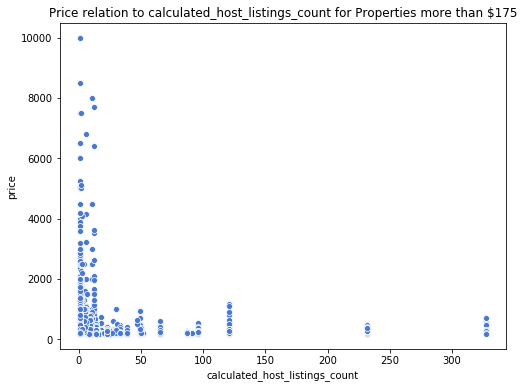

In [33]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'calculated_host_listings_count'
y = 'price'

title = 'Price relation to calculated_host_listings_count for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to calculated_host_listings_count for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

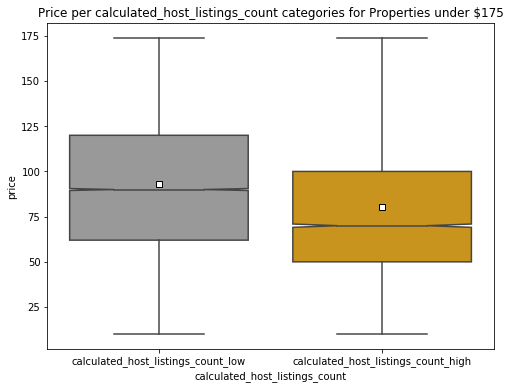

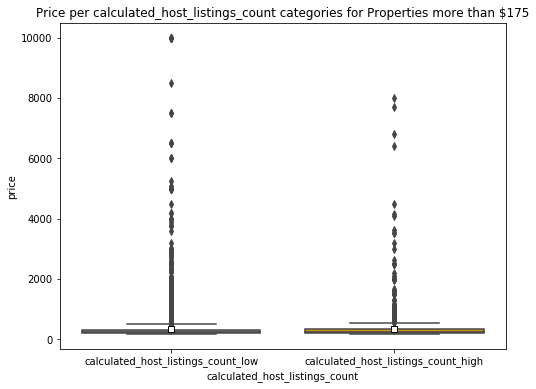

In [34]:
x = 'calculated_host_listings_count'
y='price'

title = 'Price per calculated_host_listings_count categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per calculated_host_listings_count categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

#### 3.9 Price relation to availability

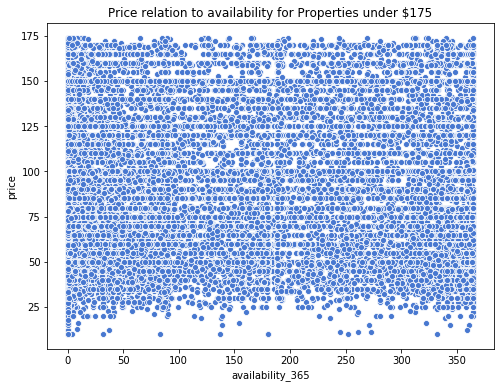

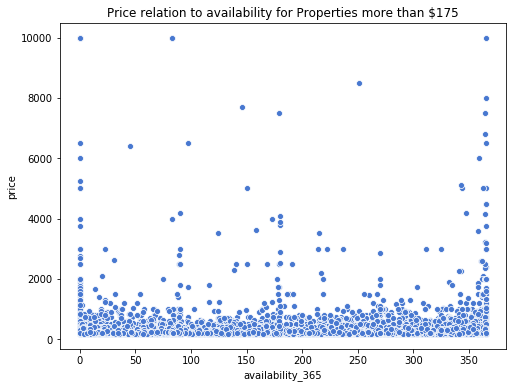

In [35]:
# see https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.set_palette("muted")
x = 'availability_365'
y = 'price'

title = 'Price relation to availability for Properties under $175'
data_filtered = data.loc[data['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()

title = 'Price relation to availability for Properties more than $175'
data_filtered = data.loc[data['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=x, y=y, data=data_filtered)
plt.title(title)
plt.ioff()
sns.set_palette(cbPalette)

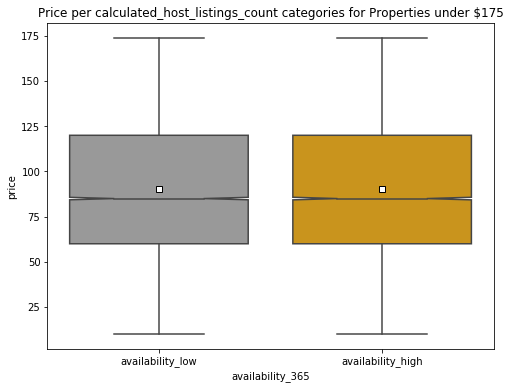

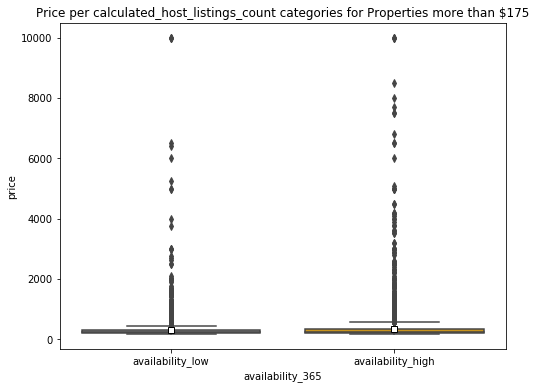

In [36]:
x = 'availability_365'
y='price'

title = 'Price per calculated_host_listings_count categories for Properties under $175'
data_filtered = data_encoded.loc[data_encoded['price'] < 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=True, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

title = 'Price per calculated_host_listings_count categories for Properties more than $175'
data_filtered = data_encoded.loc[data_encoded['price'] > 175]
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=x, y=y, data=data_filtered, notch=False, showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title(title)
plt.ioff()

# 4. Modeling first model

## 4.1 Data Preprocessing

In [37]:
# Load the Dataset  
#data.drop(['latitude', 'name',], axis=1, inplace=True)
data.drop(['name'], axis=1, inplace=True)
data_copy = data.copy()

In [38]:
#data.head()

In [39]:
# # Determine the number of missing values for every column
# data.isnull().sum()

In [40]:
# log10 transform
# https://stackoverflow.com/questions/30794525/adding-one-to-all-the-values-in-a-dataframe
# data_copy = data.copy()
data.minimum_nights += 0.000000001
data['minimum_nights'] = np.log10(data['minimum_nights'])
data.number_of_reviews += 0.000000001
data['number_of_reviews'] = np.log10(data['number_of_reviews'])
data.reviews_per_month += 0.000000001
data['reviews_per_month'] = np.log10(data['reviews_per_month'])
data.calculated_host_listings_count += 0.000000001
data['calculated_host_listings_count'] = np.log10(data['calculated_host_listings_count'])
data.availability_365 += 0.000000001
data['availability_365'] = np.log10(data['availability_365'])

In [41]:
# Encoding categorical data
data = pd.get_dummies(data, columns=['room_type'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood'], drop_first=True)
data = pd.get_dummies(data, columns=['neighbourhood_group'], drop_first=True)

In [42]:
# Filter the dataset for prices between 50 and $175
data_filtered_low = data.loc[(data['price'] < 175)]

In [43]:
# data_filtered_low.shape

In [44]:
# Filter the dataset for prices superior to $175
data_filtered_high = data.loc[(data['price'] > 175)]

In [45]:
# data_filtered_high.shape

## 4.2 Multiple Linear Regression

### 4.2.1 Modeling on lower price dataset

In [46]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [48]:
# Compare predicted and actual values
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://stackoverflow.com/questions/19100540/rounding-entries-in-a-pandas-dafaframe
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,60.0
1,85.0,72.0
2,84.0,117.0
3,75.0,61.0
4,169.0,154.0
5,50.0,59.0
6,45.0,64.0
7,95.0,103.0
8,70.0,62.0
9,58.0,62.0


In [49]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.14
R2 score train: 0.54
R2 score test: 0.52


### 4.2.2 Modeling the higher price dataset

In [50]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

In [52]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,274.0
1,195.0,234.0
2,197.0,253.0
3,299.0,267.0
4,190.0,245.0
5,250.0,253.0
6,180.0,316.0
7,300.0,337.0
8,1000.0,271.0
9,180.0,251.0


In [53]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.09
R2 score test: 0.05


## 4.3 Random Forest Regression

### 4.3.1 Modeling on lower price dataset

In [54]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [56]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [57]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,57.0
1,85.0,84.0
2,84.0,123.0
3,75.0,60.0
4,169.0,131.0
5,50.0,57.0
6,45.0,61.0
7,95.0,107.0
8,70.0,57.0
9,58.0,80.0


In [58]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.13
R2 score train: 0.62
R2 score test: 0.55


### 4.3.2 Modeling the higher price dataset

In [59]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [61]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [62]:
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,297.0
1,195.0,243.0
2,197.0,255.0
3,299.0,254.0
4,190.0,262.0
5,250.0,261.0
6,180.0,290.0
7,300.0,286.0
8,1000.0,251.0
9,180.0,242.0


In [63]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.19
R2 score train: 0.29
R2 score test: 0.16


# 5. Modeling second model

Try to bin the data first.  

## 5.1 Data Preprocessing

In [64]:
# # Combined Data and Data_ecoded
# data['availability_365_cat'] = data_encoded['availability_365']
# data.head()

In [65]:
data_encoded.drop(['name'], axis=1, inplace=True)

In [66]:
data_encoded.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,minimum_nights_low,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_high,availability_high
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,minimum_nights_low,number_of_reviews_low,reviews_per_month_low,calculated_host_listings_count_low,availability_high
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,minimum_nights_low,number_of_reviews_high,reviews_per_month_high,calculated_host_listings_count_low,availability_high
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,minimum_nights_high,minimum_nights_medium,reviews_per_month_low,calculated_host_listings_count_low,availability_low


In [67]:
# Encoding categorical data
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood_group'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['neighbourhood'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['room_type'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['minimum_nights'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['number_of_reviews'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['reviews_per_month'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['calculated_host_listings_count'], drop_first=True)
data_encoded = pd.get_dummies(data_encoded, columns=['availability_365'], drop_first=True)

In [68]:
data_encoded.head()

,host_id,latitude,longitude,price,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,neighbourhood_Arden Heights,neighbourhood_Arrochar,...,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room,minimum_nights_minimum_nights_high,number_of_reviews_minimum_nights_medium,number_of_reviews_number_of_reviews_high,reviews_per_month_reviews_per_month_high,calculated_host_listings_count_calculated_host_listings_count_high,availability_365_availability_high
0,2787,40.64749,-73.97237,149,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1
1,2845,40.75362,-73.98377,225,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,4632,40.80902,-73.94190,150,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,4869,40.68514,-73.95976,89,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
4,7192,40.79851,-73.94399,80,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [69]:
# Data filtering
# Filter the dataset for prices between 50 and $175
data_filtered_low = data_encoded.loc[(data['price'] < 175)]
# Filter the dataset for prices superior to $175
data_filtered_high = data_encoded.loc[(data['price'] > 175)]

## 5.2 Multiple Linear Regression

### 5.2.1 Modeling on lower price dataset

In [70]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

# Compare predicted and actual values
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://stackoverflow.com/questions/19100540/rounding-entries-in-a-pandas-dafaframe
df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,60.0
1,85.0,72.0
2,84.0,107.0
3,75.0,61.0
4,169.0,153.0
5,50.0,59.0
6,45.0,61.0
7,95.0,99.0
8,70.0,63.0
9,58.0,63.0


In [71]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.14
R2 score train: 0.54
R2 score test: 0.51


### 5.2.2 Modeling on higher price dataset

In [72]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = lr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,300.0,263.0
1,195.0,232.0
2,197.0,256.0
3,299.0,238.0
4,190.0,245.0
5,250.0,260.0
6,180.0,319.0
7,300.0,333.0
8,1000.0,238.0
9,180.0,215.0


In [73]:
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, lr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, lr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.09
R2 score test: 0.04


## 5.3 Random Forest Regression

### 5.3.1 Modeling on lower price dataset

In [74]:
# Split the dataset
X = data_filtered_low.drop('price', axis=1).values
y = data_filtered_low['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

,Actual,Predicted
0,33.0,57.0
1,85.0,74.0
2,84.0,117.0
3,75.0,60.0
4,169.0,131.0
5,50.0,57.0
6,45.0,60.0
7,95.0,107.0
8,70.0,59.0
9,58.0,72.0


In [75]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 1.92
Price std: 0.2
RMSE: 0.13
R2 score train: 0.6
R2 score test: 0.54


### 5.3.2 Modeling on higher price dataset

In [76]:
# Split the dataset
X = data_filtered_high.drop('price', axis=1).values
y = data_filtered_high['price'].values
y = np.log10(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8, n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

df = pd.DataFrame({'Actual': np.round(10 ** y_test, 0), 
                   'Predicted': np.round(10 ** y_pred, 0)})
df.head(10)

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

In [77]:
print('Price mean:', np.round(np.mean(y), 2))  
print('Price std:', np.round(np.std(y), 2))
print('RMSE:', np.round(np.sqrt(metrics.mean_squared_error(y_test, rfr.predict(X_test))), 2))
print('R2 score train:', np.round(r2_score(y_train, rfr.predict(X_train), multioutput='variance_weighted'), 2))
print('R2 score test:', np.round(r2_score(y_test, rfr.predict(X_test), multioutput='variance_weighted'), 2))

Price mean: 2.45
Price std: 0.2
RMSE: 0.2
R2 score train: 0.22
R2 score test: 0.09


# 6. Conclusion

* The properties have large differences in prices.  
* Separating the dataset by price categories is useful for the analysis.
* The most interesting variables regarding price prediction are:
    * Location
    * Room type
    * calculated_host_listings_count
    * Number of review
* Price prediction models are not performing well
    * Best score is 0.55
    * Prediction are nore accurate for price under $175 (75% of the dataset)
    * Using categorical ecnoded data did not improve the model
* Possible next steps
    * The next step could be to transform continuous variables into categorical variables as it can help capture non-linear relations.
    * I doubt a neural network would be useful here because the number of observations is limited.

# 7. References  
Python notebooks  

* https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb 
* https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
* https://www.kaggle.com/chirag9073/airbnb-analysis-visualization-and-prediction   
* https://www.kaggle.com/jrw2200/smart-pricing-with-xgb-rfr-interpretations   
* https://www.kaggle.com/mpanfil/nyc-airbnb-data-science-ml-project  
* https://www.kaggle.com/elcaiseri/airbnb-data-exploration-on-nyc-visualization  
* https://www.kaggle.com/nidaguler/eda-and-data-visualization-ny-airbnb  
* https://www.kaggle.com/duygut/airbnb-nyc-price-prediction  

R notebooks

* https://www.kaggle.com/josipdomazet/mining-nyc-airbnb-data-using-r#data-visualisation   

Dataset discussion  

* https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/discussion/112818#latest-649615  

Machine Learning Ressources  

* https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9   
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html   

General Data Science Ressources
* https://datascienceguide.github.io/exploratory-data-analysis
* https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html  
* http://seaborn.pydata.org/tutorial/color_palettes.html
* https://seaborn.pydata.org/tutorial.html
* https://seaborn.pydata.org/
* https://pandas.pydata.org/pandas-docs/stable/
* https://www.kaggle.com/neomatrix369/six-steps-to-more-professional-data-science-code